## 1. Download NLTK package

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## 2. Text Preprocessing
Proses preprocessing ini meliputi (1) case folding, (2) tokenizing, (3) filtering, dan (4) stemming.

#### **1. Case Folding**
Case Folding adalah tahap untuk konversi text menjadi suatu bentuk yang standar. Pada tahap ini biasanya dipilih lowercase untuk membuat huruf kapital menjadi lowercase.

Sebagai contoh : 

>Pemerintah mnerapkan PSBB untuk menangani Virus Corona.

menjadi

>pemerintah menerapkan psbb untuk menangani virus corona.

implementasinya pada python tidak perlu menggunakan library NLTK, cukup menggunakan fungsi .lower()

In [2]:
sentence = "Pemerintah mnerapkan PSBB untuk menangani Virus Corona."

# gunakan fungsi .lower()
lowercase_sentence = sentence.lower()

print(lowercase_sentence)

pemerintah mnerapkan psbb untuk menangani virus corona.


#### **2. Tokenizing**
proses pemecahan perkata menggunakan fungsi .word_tokenize() pada library NLTK. Selain itu pada tahap inijuga akan dilakukan proses removing number, whitespace dan puctuation (tanda baca).

* **Removing number**, akan menggunakan fungsi re.sub(pattern, replace_string, string) untuk replace angka dengan “” ada library re (regex) menggunakan pattern \d+ . Dimana \d untuk matching digit (0–9) dan + sebagai quantifier untuk menemukan 1 atau lebih matching \d . Sehingga penggunaanya akan seperti berikut, re.sub(r"\d+", "", "H3llo") yang akan menghasilkan Hllo .
* **Removing punctuation**, akan menggunakan fungsi .translate() yang akan memetakan teks kedalam character yang sesuai pada mapping table .maketrans() . untuk mengganti sting.punctuation berupa (!”#$%&\’()*+,-./:;<=>?@[\\]^_`{|}~) dengan "" .
* **Removing whitespace**, akan menggunakan fungsi .strip() untuk menghapus whitespace leading dan trailing, dan menggunakan fungsi regex substraction re.sub(pattern, replace_string, string) dengan pattern \s+ untuk matching whitespace dengan quantifier matching 1 atau lebih whitespace.

kita bisa menghitung jumlah kemunculan tiap kata pada text yang kita proses menggunakan fungsi .freqDist() pada library NLTK, dan melihat hasilnya dengan menggunakan method .most_common()

In [7]:
import string 
import re #regex library

# import word_tokenize from NLTK
from nltk.tokenize import word_tokenize 



# sentence input
sentence = "Sebelumnya, \n kasus positif virus Corona pada 24 April sebanyak 8.211 orang. \n Jumlah pasien sembuh Corona di RI ada 1.002 orang dan meninggal 689 orang."



# ------ Case Folding --------
# gunakan fungsi .lower()
lowercase_sentence = sentence.lower()

print('Case Folding Result : \n')
print(lowercase_sentence)
print('\n')

# ------ Tokenizing ---------
#remove angka
lowercase_sentence = re.sub(r"\d+", "", lowercase_sentence)

#remove punctuation
lowercase_sentence = lowercase_sentence.translate(str.maketrans("","",string.punctuation))

#remove whitespace leading & trailing
lowercase_sentence = lowercase_sentence.strip()

#remove multiple whitespace into single whitespace
lowercase_sentence = re.sub('\s+',' ',lowercase_sentence)


tokens = nltk.tokenize.word_tokenize(lowercase_sentence)

print('Tokenizing Result : \n') 
print(tokens)

freq_tokens = nltk.FreqDist(tokens)

print('\nFrequency Tokens : \n') 
print(freq_tokens.most_common())

Case Folding Result : 

sebelumnya, 
 kasus positif virus corona pada 24 april sebanyak 8.211 orang. 
 jumlah pasien sembuh corona di ri ada 1.002 orang dan meninggal 689 orang.


Tokenizing Result : 

['sebelumnya', 'kasus', 'positif', 'virus', 'corona', 'pada', 'april', 'sebanyak', 'orang', 'jumlah', 'pasien', 'sembuh', 'corona', 'di', 'ri', 'ada', 'orang', 'dan', 'meninggal', 'orang']

Frequency Tokens : 

[('orang', 3), ('corona', 2), ('sebelumnya', 1), ('kasus', 1), ('positif', 1), ('virus', 1), ('pada', 1), ('april', 1), ('sebanyak', 1), ('jumlah', 1), ('pasien', 1), ('sembuh', 1), ('di', 1), ('ri', 1), ('ada', 1), ('dan', 1), ('meninggal', 1)]


**Membuat visualisasi dengan Panda**

Kita akan memvisualisasikan freq_tokens menggunakan library Pandas. Terlebih dahulu kita convert freq_tokens dictionary ke Pandas Dataframe dengan menggunakan fungsi pd.DataFrame.from_dict() dengan parameter orient='index' akan menjadikan key pada dictionary menjadi row Dataframe. Setelah itu gunakan fungsi .plot() dengan kind='bar' untuk plot dataframe kedalam bar plot

<Axes: xlabel='Key'>

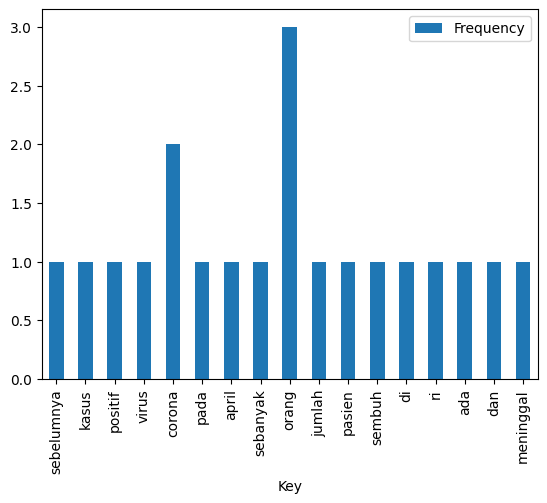

In [5]:
import pandas as pd

df_freq_tokens = pd.DataFrame.from_dict(freq_tokens, orient='index')
df_freq_tokens.columns = ['Frequency']
df_freq_tokens.index.name = 'Key'

df_freq_tokens.plot(kind='bar')

#### **3. Filtering (Stopword Removal)**
Filtering bertujuan untuk mengambil kata-kata penting pada tokens yang dihasilkan oleh proses sebelumnya. Kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna disebut Stopword. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll

Kita akan coba gunakan fungsi .stopword() pada library NLTK untuk mendapatkan list Indonesian stopwords. Berikut adalah list Indonesian stopword yang dihasilkan fungsi .stopword()

In [ ]:
{'diperlukan', 'hendaknya', 'tapi', 'dimungkinkan', 'hendaklah', 'umumnya', 'tambahnya', 'usai', 'katakan', 'sebagaimana', 'sekali', 'persoalan', 'waduh', 'bermaksud', 'jelaslah', 'ditanyai', 'tiba', 'terdahulu', 'menghendaki', 'tidak', 'sangatlah', 'kalaulah', 'rata', 'tadi', 'sendirinya', 'tersampaikan', 'sekadar', 'mengakhiri', 'mempergunakan', 'sedikit', 'sekali-kali', 'katakanlah', 'karenanya', 'oleh', 'semampunya', 'diakhirinya', 'kapanpun', 'setidaknya', 'disini', 'menaiki', 'tentunya', 'terbanyak', 'tak', 'secara', 'diibaratkannya', 'mengatakan', 'hendak', 'dikarenakan', 'sekarang', 'berturut', 'ditanyakan', 'terlihat', 'diperlukannya', 'sebuah', 'cuma', 'ingat-ingat', 'sesegera', 'mengerjakan', 'keinginan', 'berlebihan', 'apalagi', 'siapapun', 'enggaknya', 'lagi', 'diungkapkan', 'bisa', 'tentu', 'bersiap', 'dia', 'ia', 'ini', 'dituturkan', 'mendatang', 'semacam', 'sebenarnya', 'terutama', 'diibaratkan', 'tunjuk', 'inilah', 'diri', 'seterusnya', 'menandaskan', 'kenapa', 'dimulailah', 'mengibaratkan', 'wong', 'disinilah', 'bahkan', 'kelihatan', 'sudahkah', 'mempertanyakan', 'dalam', 'luar', 'memulai', 'mengucapkan', 'selalu', 'waktu', 'ataukah', 'wahai', 'beberapa', 'semuanya', 'mampu', 'sebagainya', 'memungkinkan', 'bukannya', 'jadi', 'menanyakan', 'percuma', 'bolehkah', 'sekurang-kurangnya', 'yakin', 'memperbuat', 'jadinya', 'belumlah', 'terdiri', 'menjadi', 'sekalipun', 'merekalah', 'melihat', 'terakhir', 'hari', 'wah', 'sesuatu', 'sebelum', 'mendapat', 'berapa', 'dulu', 'sudah', 'tidaklah', 'kurang', 'makanya', 'ditunjuk', 'akhiri', 'bila', 'sayalah', 'buat', 'segalanya', 'berjumlah', 'perlunya', 'apatah', 'begitukah', 'itu', 'cara', 'antara', 'sampaikan', 'amat', 'mulailah', 'tertentu', 'setibanya', 'tiga', 'maka', 'semasih', 'nyaris', 'masalah', 'sebaik-baiknya', 'pasti', 'tiba-tiba', 'awal', 'bermula', 'tegasnya', 'bukanlah', 'selamanya', 'bermacam', 'satu', 'merupakan', 'disampaikan', 'sebanyak', 'menuturkan', 'segera', 'diucapkan', 'mendatangi', 'dipergunakan', 'bertanya-tanya', 'berkata', 'memintakan', 'jelas', 'kapan', 'tanyanya', 'tetapi', 'anda', 'benar', 'semula', 'sejenak', 'perlu', 'semakin', 'memang', 'begini', 'kemudian', 'serupa', 'disebutkan', 'pun', 'turut', 'bahwasanya', 'pastilah', 'nanti', 'didatangkan', 'dan', 'sedangkan', 'dikira', 'tentang', 'tersebutlah', 'diminta', 'dituturkannya', 'cukup', 'lanjutnya', 'dibuatnya', 'ucapnya', 'baru', 'haruslah', 'meminta', 'dijelaskan', 'kelihatannya', 'lainnya', 'ada', 'ibaratnya', 'ingin', 'menyangkut', 'mendapatkan', 'pentingnya', 'dirinya', 'dialah', 'diantaranya', 'terjadilah', 'ditujukan', 'bahwa', 'nah', 'mengibaratkannya', 'terhadap', 'saat', 'ditanya', 'ikut', 'mulanya', 'bakalan', 'setiba', 'tiap', 'bagaimana', 'sela', 'diberikannya', 'hanya', 'mengingat', 'meski', 'sebutlah', 'diinginkan', 'kata', 'hingga', 'usah', 'dikatakannya', 'apabila', 'per', 'manakala', 'untuk', 'sebegini', 'yakni', 'bertanya', 'olehnya', 'dipersoalkan', 'digunakan', 'ibu', 'teringat-ingat', 'adalah', 'berikan', 'sedemikian', 'sepihak', 'tandasnya', 'tegas', 'berlainan', 'bekerja', 'dini', 'inikah', 'mendatangkan', 'seringnya', 'terjadi', 'belakang', 'lalu', 'bawah', 'kedua', 'berada', 'jelaskan', 'bersiap-siap', 'awalnya', 'asal', 'daripada', 'mungkinkah', 'boleh', 'tutur', 'tengah', 'kasus', 'berikutnya', 'masing-masing', 'keadaan', 'terjadinya', 'meyakini', 'juga', 'ditunjuki', 'manalagi', 'menunjukkan', 'namun', 'bertutur', 'sehingga', 'terus', 'jadilah', 'ternyata', 'sama-sama', 'ditandaskan', 'ibaratkan', 'mirip', 'melihatnya', 'berkali-kali', 'ataupun', 'nyatanya', 'dimulai', 'bagi', 'jawabnya', 'teringat', 'aku', 'tambah', 'sudahlah', 'inginkah', 'seluruh', 'terasa', 'berakhirlah', 'dipertanyakan', 'kan', 'menyampaikan', 'saling', 'dimisalkan', 'sementara', 'beginikah', 'memastikan', 'walaupun', 'dibuat', 'kitalah', 'berkehendak', 'bilakah', 'ujar', 'pertanyakan', 'sendiri', 'jauh', 'dipunyai', 'tanpa', 'kamu', 'menyebutkan', 'berkeinginan', 'seseorang', 'pernah', 'beri', 'siapa', 'termasuk', 'pantas', 'pertama-tama', 'kelamaan', 'memperkirakan', 'semasa', 'didapat', 'belakangan', 'malahan', 'misal', 'mengungkapkan', 'yang', 'menunjuknya', 'setinggi', 'jika', 'sekalian', 'sepantasnyalah', 'kecil', 'masa', 'mau', 'bolehlah', 'lebih', 'lewat', 'betulkah', 'menanti', 'dimaksudnya', 'sebelumnya', 'jumlahnya', 'ditegaskan', 'bukan', 'di', 'mempersiapkan', 'sebesar', 'sekecil', 'bagaimanapun', 'sedikitnya', 'melalui', 'lamanya', 'benarlah', 'misalkan', 'kapankah', 'tetap', 'lagian', 'andalah', 'mengenai', 'mulai', 'mereka', 'bersama-sama', 'selama', 'ucap', 'soal', 'banyak', 'berawal', 'misalnya', 'nantinya', 'berdatangan', 'diketahui', 'jangan', 'suatu', 'biasa', 'seluruhnya', 'menantikan', 'atau', 'diberi', 'seingat', 'adapun', 'diantara', 'sering', 'ditambahkan', 'tuturnya', 'jikalau', 'berlalu', 'sebaliknya', 'begitupun', 'naik', 'diucapkannya', 'kelima', 'sepanjang', 'setiap', 'toh', 'itulah', 'sebaiknya', 'rasa', 'akhir', 'bagaikan', 'panjang', 'bagai', 'lanjut', 'benarkah', 'macam', 'sejumlah', 'menanya', 'semisalnya', 'serta', 'berujar', 'dekat', 'amatlah', 'artinya', 'bagaimanakah', 'khususnya', 'bersama', 'tandas', 'sebisanya', 'sejauh', 'sekitar', 'telah', 'balik', 'itukah', 'terlalu', 'dimaksudkan', 'sesekali', 'sebutnya', 'katanya', 'tidakkah', 'disebutkannya', 'sesudah', 'tampak', 'kalian', 'secukupnya', 'jawab', 'saya', 'masih', 'melakukan', 'pak', 'pula', 'dengan', 'menunjuk', 'sinilah', 'kembali', 'agaknya', 'antaranya', 'jelasnya', 'mengucapkannya', 'gunakan', 'diperkirakan', 'semua', 'tadinya', 'bermacam-macam', 'sebetulnya', 'jangankan', 'apaan', 'caranya', 'berapapun', 'demi', 'diperbuat', 'diperbuatnya', 'kira-kira', 'menginginkan', 'keterlaluan', 'tempat', 'bakal', 'menegaskan', 'tertuju', 'perlukah', 'sebaik', 'kita', 'agar', 'ketika', 'terkira', 'kalau', 'keseluruhannya', 'cukupkah', 'paling', 'seberapa', 'dua', 'selain', 'menyiapkan', 'setelah', 'justru', 'diingat', 'akulah', 'berkenaan', 'walau', 'lah', 'beginian', 'akhirnya', 'dikatakan', 'berapalah', 'soalnya', 'menurut', 'tanyakan', 'menjawab', 'seorang', 'ditunjukkannya', 'apakah', 'tersebut', 'makin', 'mengapa', 'sebagai', 'hanyalah', 'sebegitu', 'cukuplah', 'bukankah', 'sambil', 'dimaksudkannya', 'sesuatunya', 'selama-lamanya', 'sesama', 'hal', 'terdapat', 'apa', 'ialah', 'baik', 'belum', 'setidak-tidaknya', 'bulan', 'menambahkan', 'lama', 'masalahnya', 'mempersoalkan', 'melainkan', 'dahulu', 'berapakah', 'kiranya', 'demikian', 'lain', 'seperlunya', 'tentulah', 'meskipun', 'selaku', 'agak', 'diakhiri', 'saatnya', 'depan', 'dong', 'ungkapnya', 'guna', 'sedang', 'saja', 'kesampaian', 'berikut', 'memisalkan', 'penting', 'mengetahui', 'sekaligus', 'akankah', 'karena', 'pertanyaan', 'harus', 'kemungkinannya', 'semaunya', 'para', 'bung', 'keduanya', 'lima', 'jumlah', 'menyatakan', 'siap', 'kinilah', 'dipastikan', 'memerlukan', 'keluar', 'sama', 'sini', 'datang', 'selanjutnya', 'sajalah', 'sesaat', 'diingatkan', 'dimulainya', 'kalaupun', 'mengingatkan', 'harusnya', 'setempat', 'diperlihatkan', 'inginkan', 'mengatakannya', 'menjelaskan', 'entahlah', 'merasa', 'kini', 'ke', 'pertama', 'seolah-olah', 'berbagai', 'terhadapnya', 'jawaban', 'dapat', 'kebetulan', 'sesudahnya', 'berturut-turut', 'sangat', 'sampai', 'padanya', 'waktunya', 'menanyai', 'demikianlah', 'biasanya', 'betul', 'disebut', 'dilakukan', 'kemungkinan', 'pada', 'padahal', 'empat', 'beginilah', 'sempat', 'minta', 'menuju', 'ditunjuknya', 'se', 'sekurangnya', 'sekadarnya', 'pihak', 'dilihat', 'seolah', 'seperti', 'kepadanya', 'dimaksud', 'bagian', 'enggak', 'punya', 'keseluruhan', 'mampukah', 'adanya', 'tepat', 'menanti-nanti', 'begitulah', 'terlebih', 'maupun', 'sewaktu', 'rasanya', 'semata', 'menunjuki', 'dari', 'kamulah', 'sejak', 'kala', 'sekitarnya', 'begitu', 'seharusnya', 'kok', 'sampai-sampai', 'ditunjukkan', 'mengira', 'masing', 'supaya', 'diketahuinya', 'pukul', 'menyeluruh', 'semata-mata', 'berlangsung', 'tahun', 'diberikan', 'rupanya', 'tampaknya', 'menggunakan', 'atas', 'bisakah', 'tinggi', 'kamilah', 'mempunyai', 'pihaknya', 'berakhir', 'sepertinya', 'ujarnya', 'dikerjakan', 'sana', 'ungkap', 'berakhirnya', 'seketika', 'siapakah', 'umum', 'meyakinkan', 'sebabnya', 'membuat', 'dijelaskannya', 'kira', 'kepada', 'yaitu', 'seenaknya', 'malah', 'ibarat', 'janganlah', 'memihak', 'memberi', 'berarti', 'semampu', 'entah', 'sebut', 'segala', 'mungkin', 'memperlihatkan', 'sekiranya', 'hampir', 'tanya', 'berupa', 'sebagian', 'akan', 'semisal', 'besar', 'sebab', 'sesampai', 'dijawab', 'ingat', 'asalkan', 'sepantasnya', 'setengah', 'tahu', 'antar', 'dilalui', 'mana', 'seusai', 'masihkah', 'mula', 'memberikan', 'sendirian', 'kami', 'dimintai', 'bapak'}

In [8]:
from nltk.corpus import stopwords

# tokenize text
freq_tokens

# get Indonesian stopword 
list_stopwords = set(stopwords.words('indonesian'))

#remove stopword pada list token
tokens_without_stopword = [word for word in freq_tokens if not word in list_stopwords]


print(tokens_without_stopword)

['orang', 'corona', 'positif', 'virus', 'april', 'pasien', 'sembuh', 'ri', 'meninggal']


jika kita perhatikan hasil filtering tersebut dan bandingkan dengan freq_tokens sebelumnya, kata sebelumnya, kasus, positif, pada, sebanyak, jumlah, di, ada, dan telah dihilangkan karena termasuk Stopword.

#### **4. Stemming**
Tahap ini akan menghilangkan suffix dan prefix pada token/kata (_reduce inflected_), sehingga sebuah kata yang memiliki suffix maupun prefix akan kembali kebentuk dasarnya, contohnya :

>* kesembuhan : sembuh
>* pertolongan : tolong
>* membersikan : bersih

Pada library NLTK sudah tersedia algoritma untuk proses stemming, mulai dari ,

- Porter algorithm
- Lancester algorithm
- WordNet Lemmatizer algorithm
- SnowBall algorithm

namun sayangnya belum mensupport bahasa indonesia, berikut adalah implementasinya pada bahasa inggris,

In [ ]:
from nltk.stem import PorterStemmer 
   
stemmer = PorterStemmer() 
  
plurals = ['caresses', 'flies', 'dies', 'mules', 'denied',
        'died', 'agreed', 'owned', 'humbled', 'sized',
        'meeting', 'stating', 'siezing', 'itemization',
        'sensational', 'traditional', 'reference', 'colonizer',
        'plotted'] 
  
singles = [(plural + " : " + stemmer.stem(plural)) for plural in plurals]

singles

untuk kebutuhan stemming dalam bahasa Indonesia, maka kita akan gunakan library Sastrawi yang dapat diinstall melalui pip

In [9]:
%pip install PySastrawi

     ---------------------------------------- 0.0/210.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/210.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/210.6 kB ? eta -:--:--
     ------- ----------------------------- 41.0/210.6 kB 245.8 kB/s eta 0:00:01
     ---------- -------------------------- 61.4/210.6 kB 365.7 kB/s eta 0:00:01
     ---------------- -------------------- 92.2/210.6 kB 438.1 kB/s eta 0:00:01
     ------------------------ ----------- 143.4/210.6 kB 532.5 kB/s eta 0:00:01
     ----------------------------- ------ 174.1/210.6 kB 551.6 kB/s eta 0:00:01
     --------------------------------- -- 194.6/210.6 kB 562.0 kB/s eta 0:00:01
     --------------------------------- -- 194.6/210.6 kB 562.0 kB/s eta 0:00:01
     ------------------------------------ 210.6/210.6 kB 474.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Sastrawi merupakan hasil porting dari library Sastrawi PHP . Penggunaanya pada python, sebagai berikut,

In [10]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# token without stopword
list_tokens = tokens_without_stopword

# stem
output   = [(token + " : " + stemmer.stem(token)) for token in list_tokens]

output

['orang : orang',
 'corona : corona',
 'positif : positif',
 'virus : virus',
 'april : april',
 'pasien : pasien',
 'sembuh : sembuh',
 'ri : ri',
 'meninggal : tinggal']

dari hasil Stemming menggunakan library Sastrawi, kita dapat melihat bahwa kata meninggal dikembalikan kebentuk dasarnya menjadi tinggal